# WeRateDog项目

### （1）收集项目数据
收集下面描述的三份数据，在 Jupyter Notebook 命名为 wrangle_act.ipynb ：

- WeRateDogs推特档案。这个数据都可以从Github repo中下载到。
- 推特图片预测，即根据神经网络，出现在每个推特中狗的品种(或其他物体、动物等)。这个文件目前也在Github repo中，你需要使用Python的Requests和对应的URL
(https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv)
来进行编程下载。
- 每条推特的数据，至少要包含转发数（retweet_count）和喜欢数（favorite_count），以及任何你觉得有趣的额外数据。在 WeRateDog 推特档案中的推特ID中，使用Python Tweepy库查询API中每个JSON数据，把每个推特的JSON数据的完整集合存储到一个名为 tweet_json.txt 的文件中。每个推特的JSON数据应当写入单独一行。然后将这个.txt文件逐行读入一个pandas DataFrame中，（至少）包含tweet ID、retweet_count和favorite_count字段。注释：不要包含你项目提交的推特 API 密钥和访问令牌。

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json
import re as re

In [24]:
# [1]读入WeRateDogs推特档案twitter-archive-enhanced.csv
archive = pd.read_csv('./twitter-archive-enhanced.csv')
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
# [2]使用Python的Requests和对应的URL来进行编程下载image-predictions.tsv
file_url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
r = requests.get(file_url, stream=True)
with open("image_predictions.txt","w") as f:
        f.write(r.text)
image_pre = pd.read_csv('./image_predictions.txt', sep='\t')
image_pre.info()

# 直接读取image-predictionstsv文件
# image_pre = pd.read_csv('./image-predictions.tsv','\t')
# image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [26]:
# [3]使用Python Tweepy把每个推特的JSON数据的完整集合存储到一个名为tweet_json.txt的文件中。
# 包含tweet ID、retweet_count和favorite_count字段。
# 直接读取
tweet = []
with open('./tweet_json.txt') as fp:
    for line in fp:
        obj = json.loads(line)
        tweet.append([int(obj['id_str']), obj['retweet_count'], obj['favorite_count']])
tweet_df = pd.DataFrame(tweet, index=None, columns=['tweet_id','retweet_count','favorite_count'])
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### （2）评估项目数据
收集上述数据的每个内容后，从视觉上和程序上，对质量和清洁度进行数据评估。在你的wrangle_act.ipynb Jupyter Notebook中查找和记录至少8个质量问题和2个清洁度问题。为了符合规范，必须评估符合项目动机的问题。

#### 质量
##### `archive` 表格
- in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id类型为float64，显示错误。
- timestamp和retweeted_status_timestamp为str，应为datetime对象。
- `archive`表格中doggo、floofer、pupper、puppo列为None的缺失值应统一为NaN。
- name列中有‘a’、‘an’、‘the’等无效信息。
- `archive`表格中有name项缺失，可以在text项中分析得到。
- `archive`表格中有'rating_denominator'分数不为10，有23条，需要一一检查清洗。
- `archive`表格中doggo、pupper、puppo、floofer信息缺失，需要在text列中找到并补全。

##### `image_pre` 表格
- `image_pre`表格中有重复记录，需要去重。

##### `tweet_df` 表格

#### 清洁度
- source列中冗余信息多，值可简化为'iPhone','Vine','Web','TweetDeck'。
- 表格中列doggo、floofer、pupper、puppo应合并为一列。(?是否需要?)
- 每条tweet应该有retweet_count和favorite_count将archive和tweet_df表merge在一起。




### （3）清洗项目数据
评估时清洗你记录的每个问题。在 wrangle_act.ipynb 完成清洗。结果应该为优质干净的主要pandas DataFrame(如有，或为多个DataFrame)。必须评估符合项目动机的问题。

In [27]:
# 建立清洗副本
archive_clean = archive.copy()
image_pre_clean = image_pre.copy()
tweet_df_clean = tweet_df.copy()

In [28]:
# 质量问题
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
# in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id显示错误。
archive_clean.in_reply_to_status_id = archive_clean.loc[archive_clean.in_reply_to_status_id.notnull() == True,'in_reply_to_status_id'].astype(int).astype(str).str.pad(18,fillchar='0')
archive_clean.in_reply_to_user_id = archive_clean.loc[archive_clean.in_reply_to_user_id.notnull() == True,'in_reply_to_user_id'].astype(int).astype(str).str.pad(18,fillchar='0')
archive_clean.retweeted_status_id = archive_clean.loc[archive_clean.retweeted_status_id.notnull() == True,'retweeted_status_id'].astype(int).astype(str).str.pad(18,fillchar='0')
archive_clean.retweeted_status_user_id = archive_clean.loc[archive_clean.retweeted_status_user_id.notnull() == True,'retweeted_status_user_id'].astype(int).astype(str).str.pad(18,fillchar='0')

In [30]:
archive_clean.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
162,860524505164394496,NaN,NaN,2017-05-05 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,None,None,None,None
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
1929,674042553264685056,NaN,NaN,2015-12-08 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle the cuteness anymore. Curls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674042553...,12,10,None,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. Her tennis ball slowly rolled d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680583894...,8,10,Penny,None,None,None,None
258,843604394117681152,NaN,NaN,2017-03-19 23:25:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,None,None,None,None
1481,693280720173801472,NaN,NaN,2016-01-30 03:52:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie and her 2 pups Shebang &amp; Ruf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693280720...,10,10,Sadie,None,None,None,None
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,None,None,None,None


In [31]:
# timestamp和retweeted_status_timestamp为str，应为datetime对象。
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp,infer_datetime_format=True)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.loc[archive_clean.retweeted_status_timestamp.notnull() == True,'retweeted_status_timestamp'], infer_datetime_format=True)

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

In [32]:
# archive表格中有'rating_denominator'分数不为10，有23条，需要一一检查清洗。
# 1. 提取text中含有分母为10的字段进行清洗
update_grade = archive_clean[archive_clean.rating_denominator !=10].loc[:,['text','rating_numerator','rating_denominator']]
update_grade['new_grade'] = update_grade.text.str.extract('(\d+\/10)').str[:-3]
update_grade.loc[update_grade['new_grade'].isnull() == False, 'rating_numerator'] = update_grade.new_grade
update_grade.loc[update_grade['new_grade'].isnull() == False, 'rating_denominator'] = 10
archive_clean.update(update_grade)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(int)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(int)

# 2. 规整其余分母不为10的数据。
archive_clean.rating_numerator = archive_clean.rating_numerator.truediv((archive_clean.rating_denominator.div(10)))
archive_clean.rating_denominator = 10

# 3. tweet_id为832088576586297345的text中的11/15/15是账户创建日期，应修改rating_numerator、rating_denominator为空值。
# tweet_id为810984652412424192的评分不为24/7，text中的24/7是指狗狗微笑7天24h（每时每刻），应修改rating_numerator、rating_denominator为空值。
archive_clean.loc[archive_clean.tweet_id == 832088576586297345, 'rating_numerator'] = np.nan
archive_clean.loc[archive_clean.tweet_id == 832088576586297345, 'rating_denominator'] = np.nan
archive_clean.loc[archive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = np.nan
archive_clean.loc[archive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = np.nan
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2354 non-null float64
rating_denominator            2354 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [33]:
# archive表格中name、doggo、floofer、pupper、puppo列为None的缺失值应统一为NaN。
archive_clean.loc[archive_clean['name']=='None','name'] = np.nan
archive_clean.loc[archive_clean['doggo']=='None','doggo'] = np.nan
archive_clean.loc[archive_clean['floofer']=='None','floofer'] = np.nan
archive_clean.loc[archive_clean['pupper']=='None','pupper'] = np.nan
archive_clean.loc[archive_clean['puppo']=='None','puppo'] = np.nan
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2354 non-null float64
rating_denominator            2354 non-null float64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](

In [34]:
# name列中有‘a’、‘an’、‘the’等无效信息。
wrong_name = archive_clean.name.str.extract('(?P<name>^[a-z]*)').value_counts().index.tolist()
wrong_name.pop(0)
wrong_name

/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


['a',
 'the',
 'an',
 'very',
 'quite',
 'just',
 'one',
 'getting',
 'mad',
 'actually',
 'not',
 'his',
 'all',
 'unacceptable',
 'infuriating',
 'life',
 'this',
 'by',
 'light',
 'old',
 'space',
 'incredibly',
 'officially',
 'such',
 'my']

In [35]:
for name in wrong_name:
    archive_clean.loc[archive.name == name, 'name'] = np.nan
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2354 non-null float64
rating_denominator            2354 non-null float64
name                          1502 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](

In [36]:
# archive表格中有name项缺失，可以在text项中分析得到。
# 通过正则化得到15个缺失的名字，并且update到archive_clean中。
# 35           Howard
# 168            Zoey
# 204            Blue
# 349            Blue
# 784        Bretagne
# 843         Charley
# 852            Zoey
# 992          Quizno
# 1068       Bretagne
# 1678           Thea
# 1734     Sabertooth
# 1842          Yoshi
# 2237         Oliver
# 2267            Big
# 2287          Daryl

update_name = archive_clean[archive_clean.name.isnull() == True].loc[:,['text','name']]
update_name['name'] = update_name.text.str.extract('(\sis\s[A-Z]+[a-z]*)').str[3:]
archive_clean.update(update_name)
archive_clean.loc[2237,'name']

/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


' Oliver'

In [37]:
# archive表格中pupper, puppo, doggo, floofer信息缺失，需要在text列中找到并补全。
archive_clean.loc[archive_clean.text.str.extract('(doggo)').notnull() == True,'doggo']='doggo'
archive_clean.loc[archive_clean.text.str.extract('(pupper)').notnull() == True,'pupper']='pupper'
archive_clean.loc[archive_clean.text.str.extract('(puppo)').notnull() == True,'puppo']='puppo'
archive_clean.loc[archive_clean.text.str.extract('([fF]loof[a-z]+)').notnull() == True,'floofer']='floofer'

# # 检查发现index为200、764、854、1152的数据在doggo(pupper)和floofer都有记录。
# # 1. index=200的text:"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl..."
# # 故修改其doggo值为NaN
# archive_clean.loc[200,'doggo'] = np.nan
# # 2. index为764与854是相同记录（retweet），查看照片是一只牛，所以删除这两条记录。
# archive_clean = archive_clean.drop([764,854])
# # 3. index为1152的数据查看后发现的确为pupper，修改其floofer记录为NaN。
# archive_clean.loc[1152,'floofer'] = np.nan

# archive_clean.info()

/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.
/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: cu

In [38]:
# image_pre表格中有重复记录，需要去重。
image_pre = image_pre.drop(image_pre[image_pre['jpg_url'].duplicated()].index)
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [39]:
# 清洁度
# source列中冗余信息多，值可简化为'iPhone','Vine','Web','TweetDeck'。
archive_clean.loc[archive_clean.source.str.extract('(iPhone)').notnull() == True,'source']='iPhone'
archive_clean.loc[archive_clean.source.str.extract('(Vine)').notnull() == True,'source']='Vine'
archive_clean.loc[archive_clean.source.str.extract('(Web)').notnull() == True,'source']='Web'
archive_clean.loc[archive_clean.source.str.extract('(TweetDeck)').notnull() == True,'source']='TweetDeck'
archive_clean.source.value_counts()

/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.
/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """
/Users/ongleyi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

iPhone       2221
Vine           91
Web            33
TweetDeck      11
Name: source, dtype: int64

In [40]:
# 表格中列doggo、floofer、pupper、puppo应合并为一列。

def func(rows):
    size_sum = ''
    for size in rows:
        if isinstance(size, str):
            size_sum += size + '/'
        else:
            continue
    return size_sum[:-1]

archive_clean['dogsize'] = archive_clean.loc[:,['doggo','floofer','pupper','puppo']].apply(func, axis=1) 
archive_clean.loc[archive_clean.dogsize == '', 'dogsize'] = np.nan
archive_clean.loc[archive_clean.dogsize=='doggo/pupper']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogsize
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,iPhone,"This is Dido. She's playing the lead role in ""...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,NaN,pupper,NaN,doggo/pupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,iPhone,Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,doggo,NaN,pupper,NaN,doggo/pupper
565,802265048156610565,733109485275860992,000000004196983835,2016-11-25 21:37:47,iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/802265048...,11.0,10.0,NaN,doggo,NaN,pupper,NaN,doggo/pupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,iPhone,This is Bones. He's being haunted by another d...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,NaN,pupper,NaN,doggo/pupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,iPhone,This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,NaN,pupper,NaN,doggo/pupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,Vine,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaT,https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,doggo,NaN,pupper,NaN,doggo/pupper
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11,iPhone,"RT @dog_rates: Like father (doggo), like son (...",733109485275860992,000000004196983835,2016-05-19 01:38:16,https://twitter.com/dog_rates/status/733109485...,12.0,10.0,NaN,doggo,NaN,pupper,NaN,doggo/pupper
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36,iPhone,RT @dog_rates: This is just downright precious...,741067306818797568,000000004196983835,2016-06-10 00:39:48,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,NaN,doggo,NaN,pupper,NaN,doggo/pupper
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,NaN,pupper,NaN,doggo/pupper
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,iPhone,Please stop sending it pictures that don't eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,NaN,doggo,NaN,pupper,NaN,doggo/pupper


In [41]:
# 每条tweet应该有其他信息，将archive和tweet_df、image_pre表merge在一起。
archive_clean = pd.merge(archive_clean, tweet_df_clean, on=['tweet_id'],how = 'left')
archive_clean = pd.merge(archive_clean, image_pre_clean, on=['tweet_id'],how = 'left')
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2354 non-null float64
rating_denominator            2354 non-null float64
name                          1517 non-null object
doggo                         107 non-null object
floofer                       22 non-null object
pupper                        281 non-null object
puppo                         38 non-null object
dogsize               

### （4）存储、分析和可视化项目数据
在CSV文件中存储洁净的数据，命名为twitter_archive_master.csv。如果因为清洁需要多个表格，存在附加文件，要给这些文件合理命名。另外，你可以把清洗后的数据存储在SQLite数据库中 (如有需要也可以提交)。

在wrangle_act.ipynb Jupyter Notebook中对清洗后的数据进行分析和可视化。必须生成至少3个见解和1个可视化。

In [161]:
# 在CSV文件中存储洁净的数据，命名为twitter_archive_master.csv。
archive_clean.to_csv('twitter_archive_master.csv', index = False) 

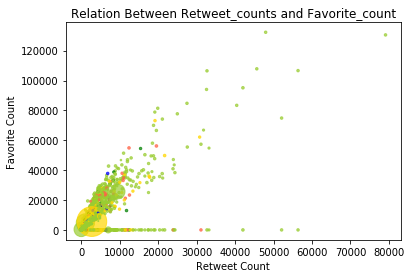

In [236]:
# Visualization1：转发数、喜欢数与评分的关系
# archive_visual = archive_clean.loc[archive_clean.dogsize.isnull() == False ,['rating_numerator','rating_denominator','dogsize','retweet_count','favorite_count']]
archive_visual = archive_clean.loc[:,['rating_numerator','rating_denominator','dogsize','retweet_count','favorite_count','p1']]
archive_visual['grade'] = archive_visual['rating_numerator'].div(archive_visual['rating_denominator'])
archive_visual['dogsize'] = archive_visual['dogsize'].fillna('unknow')

x = archive_visual['retweet_count']
y = archive_visual['favorite_count']
area = archive_visual['grade']
colors = {'doggo':'tomato', 'pupper':'gold', 'puppo':'green','unknow':'yellowgreen','floofer':'blue','doggo/puppo':'darkorange','doggo/floofer':'navy','doggo/pupper':'darkred','floofer/pupper':'darkgreen'}
plt.title('Relation Between Retweet_counts and Favorite_count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
# colorbar
plt.scatter(x, y, s=area*5, c=archive_visual['dogsize'].apply(lambda x: colors[x]), alpha=0.7)
plt.show()

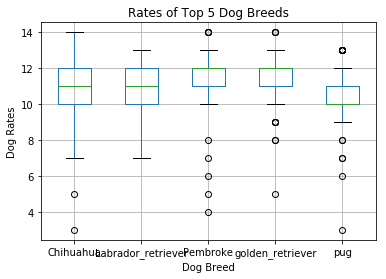

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

In [237]:
# Visualization2：数量前5的狗狗的评分箱线图
l = archive_clean.p1.value_counts()[:5]
breed = {}
for i in l.index:
    breed[i] = archive_visual.loc[archive_visual.p1==i,'rating_numerator']
breed_df = pd.DataFrame(breed)
breed_df.boxplot()
plt.xlabel('Dog Breed')
plt.ylabel('Dog Rates')
plt.title('Rates of Top 5 Dog Breeds')
plt.show()
l

#### 见解：
- 存在宠溺狗狗，导致分数远远大于10的例子，但这些夸张的评分喜欢数和转发数都不是最多的。
- 转发retweet_count与喜欢favorite_count呈线性关系。这里有177组数据的favorite_count数据为0，猜想可能有数据缺失？
- 比较评分数前五的狗狗，分别为golden_retriever金毛, Labrador_retriever拉布拉多, Pembroke柯基, Chihuahua吉娃娃, pug巴哥的评分箱线图，可以发现：
    - 巴哥可爱又麻烦：巴哥均分最低，而且有较多低分。一方面巴哥由于其无辜的表情、温柔善良的性格深受人们的喜爱，饲养的人非常多；二评分低也可能与它们容易遭受着呼吸系统、关节、牙齿、皮肤等方面的疾病有关。
    - 拉布拉多大众情人：拉布拉多的评分集中在1.0-1.2，而且没有特别低的异常评分，可以算的上最不容易让人失望的狗狗了。
    - 吉娃娃两极分化：评分跨度较大，评分总体满意。
    - 柯基和金毛的平均分最高。